In [1]:
import json
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_plotly_dash import JupyterDash

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from src.CreateFigures import graficar_error_tipo_de_suelo

## Ejemplo particular algoritmo de clasificación

### Cargar Datos (librería Pandas)

In [2]:
import pandas as pd

datos_urbanos_entrenamiento = pd.read_csv('./data/data_400k_atmosfere_train.csv', sep=';')
datos_urbanos_prueba_previos = pd.read_csv('./data/data_100k_atmosfere_test.csv', sep=';')

### Explorar Datos Entrenamiento (librerías Pandas y Numpy)

In [3]:
datos_urbanos_entrenamiento.head()

,label,0,1,2,3,4,5,6,7,8,9,10
0,1,11307.126,10535.025,9957.730,9328.1710,16205.812,14058.183,11157.457,9490.906,5984.3790,0.227315,0.247315
1,1,15770.389,14806.718,13934.342,14220.0625,18000.357,19486.440,17995.285,13934.342,8519.1880,0.217005,0.237708
2,1,14006.371,12951.784,12386.999,11284.5500,22575.480,17016.967,12934.234,11932.298,8082.5005,0.225678,0.246700
3,1,15163.064,14301.527,13556.456,14199.4190,15494.917,16959.531,15995.885,13709.619,8056.9736,0.226130,0.247268
4,1,14644.876,14378.099,14185.647,14502.8590,16248.193,16921.110,17157.360,12511.985,7060.9697,0.228295,0.250043


In [4]:
datos_urbanos_entrenamiento.shape

(400002, 12)

In [5]:
datos_urbanos_entrenamiento.describe()

,label,0,1,2,3,4,5,6,7,8,9,10
count,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000,400002.000000
mean,2.000000,13698.865831,12815.509844,12151.481693,11818.876364,15517.964485,14253.359270,12100.678571,11950.909733,7092.962866,0.223546,0.244036
std,0.816498,2053.973010,2194.913630,2403.765595,3047.507402,5636.986384,5524.447136,4394.215033,2680.459830,1040.974952,0.011196,0.012382
min,1.000000,89.201935,81.556050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111664,0.117946
25%,1.000000,12468.423000,11473.412000,10541.205000,9442.662000,9744.910000,8573.289000,8029.913000,10063.991500,6199.114700,0.220746,0.241686
50%,2.000000,13412.983000,12558.899000,11965.800000,11615.103000,16446.701000,15005.486000,11912.929000,11689.002000,6887.099600,0.224825,0.245439
75%,3.000000,14721.007500,13808.834000,13327.353750,13637.011000,19414.998750,18288.103500,15513.526000,13315.564000,8033.042000,0.227534,0.248066
max,3.000000,54470.910000,56271.957000,56369.560000,58702.484000,69105.480000,91339.990000,104557.180000,58938.210000,20610.035000,0.243676,0.263404


In [6]:
datos_urbanos_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400002 entries, 0 to 400001
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   label   400002 non-null  int64  
 1   0       400002 non-null  float64
 2   1       400002 non-null  float64
 3   2       400002 non-null  float64
 4   3       400002 non-null  float64
 5   4       400002 non-null  float64
 6   5       400002 non-null  float64
 7   6       400002 non-null  float64
 8   7       400002 non-null  float64
 9   8       400002 non-null  float64
 10  9       400002 non-null  float64
 11  10      400002 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 36.6 MB


In [7]:
import numpy as np 

np.unique(datos_urbanos_entrenamiento.label)

array([1, 2, 3])

In [8]:
?np.unique

Signature:
np.unique(
    ar,
    return_index=False,
    return_inverse=False,
    return_counts=False,
    axis=None,
)
Docstring:
Find the unique elements of an array.

Returns the sorted unique elements of an array. There are three optional
outputs in addition to the unique elements:

* the indices of the input array that give the unique values
* the indices of the unique array that reconstruct the input array
* the number of times each unique value comes up in the input array

Parameters
----------
ar : array_like
    Input array. Unless `axis` is specified, this will be flattened if it
    is not already 1-D.
return_index : bool, optional
    If True, also return the indices of `ar` (along the specified axis,
    if provided, or in the flattened array) that result in the unique array.
return_inverse : bool, optional
    If True, also return the indices of the unique array (for the specified
    axis, if provided) that can be used to reconstruct `ar`.
return_counts : bool, optiona

### Dividir Prueba en Validación y Prueba (librería Sklearn)

In [9]:
from sklearn.model_selection import train_test_split

datos_urbanos_prueba, datos_urbanos_validacion = train_test_split(datos_urbanos_prueba_previos, test_size=.5, random_state=0)

### Entrenar regresión logística (librería Sklearn)

In [10]:
%%time 
# aproximadamente, 2 minutos
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(penalty='l2', max_iter=1000, multi_class='multinomial', random_state = 0)
modelo.fit(datos_urbanos_entrenamiento[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']], datos_urbanos_entrenamiento.label)

CPU times: user 9min 30s, sys: 8min 31s, total: 18min 1s
Wall time: 1min 48s


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

### Inspeccionar desempeño del modelo (Librerías Sklearn, Pandas)

In [11]:
preddiccion_prueba = modelo.predict(datos_urbanos_prueba[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
print(f'clase predecida primeros 10 elementos: {preddiccion_prueba[0:10]}\n')

prob_preddiccion_prueba = modelo.predict_proba(datos_urbanos_prueba[['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']])
print(f'probabilidades predecidas primer elemento: {prob_preddiccion_prueba[0]}')

clase predecida primeros 10 elementos: [2 1 2 2 2 3 2 1 2 2]

probabilidades predecidas primer elemento: [0.43849308 0.44924343 0.11226348]


In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(datos_urbanos_prueba.label ,preddiccion_prueba)

0.81406

In [12]:
matriz_de_confusion = pd.crosstab(datos_urbanos_prueba.label ,preddiccion_prueba, rownames=['Verdaderos'], colnames=['Predicción'])
matriz_de_confusion

Predicción,1,2,3
Verdaderos,,,
1,4523,882,58
2,6860,34321,1395
3,24,78,1859


## Regresión Logística varias penalizaciones

In [13]:
parametros_del_modelo = modelo.get_params()
penalizacion_regularizacion = parametros_del_modelo['C']
penalizacion_regularizacion

1.0

In [19]:
rango_de_penalizaciones = [0.001,0.01,0.1,1,10,100]
variables_modelo = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
entrenar_modelo = True

if entrenar_modelo:
    error_de_entrenamiento= {}
    error_de_prueba = {}
    error_de_validacion = {}
    
    # iterar sobre distintos valores de la penalizacion
    for penalizacion in rango_de_penalizaciones:
        print(f'procesando C={penalizacion}')
        # crear modelo
        nuevo_modelo = LogisticRegression(penalty='l2', max_iter=1000, multi_class='multinomial', C = penalizacion, random_state = 0)
        nuevo_modelo.fit(datos_urbanos_entrenamiento[variables_modelo], datos_urbanos_entrenamiento.label)

        # calcular error entrenamiento, prueba, validacion
        prediccion_entrenamiento = nuevo_modelo.predict(datos_urbanos_entrenamiento[variables_modelo])
        error_de_entrenamiento[penalizacion] = accuracy_score(datos_urbanos_entrenamiento.label , prediccion_entrenamiento)

        prediccion_prueba = nuevo_modelo.predict(datos_urbanos_prueba[variables_modelo])
        error_de_prueba[penalizacion] = accuracy_score(datos_urbanos_prueba.label , prediccion_prueba)

        prediccion_validacion = nuevo_modelo.predict(datos_urbanos_validacion[variables_modelo])
        error_de_validacion[penalizacion] = accuracy_score(datos_urbanos_validacion.label , prediccion_validacion)
    
    #guardar resultados
    with open('./data/error_de_entrenamiento.json', 'w') as file:
        json.dump(error_de_entrenamiento, file)
        
    with open('./data/error_de_prueba.json', 'w') as file:
        json.dump(error_de_prueba, file)

    with open('./data/error_de_validacion.json', 'w') as file:
        json.dump(error_de_validacion, file)
else:
    with open('./data/error_de_entrenamiento.json', 'r') as file:
        error_de_entrenamiento= json.load(file)
    with open('./data/error_de_prueba.json', 'r') as file:
        error_de_prueba = json.load(file)
    with open('./data/error_de_validacion.json', 'r') as file:
        error_de_validacion = json.load(file)

procesando C=0.001
procesando C=0.01
procesando C=0.1
procesando C=1
procesando C=10
procesando C=100


In [20]:
app = JupyterDash(__name__)

errores = {'entrenamiento':error_de_entrenamiento, 
           'prueba': error_de_prueba, 
           'validacion': error_de_validacion}

# app
app.layout = html.Div([html.Div([html.H1("Error de modelos de regresión logistca"),
                                 dcc.Dropdown(id='model-options',
                                              options=[{'label': 'Entrenamiento', 'value': 'entrenamiento'},
                                                       {'label': 'Prueba', 'value': 'prueba'},
                                                       {'label': 'Validación', 'value': 'validacion'}],
                                              value=['entrenamiento'],
                                              multi=True)]),
                       html.Div([dcc.Graph(id='error',figure={})],
                                style= {'width': '50%', 
                                        'display': 'flex'})])

@app.callback(
    Output(component_id='error', component_property='figure'),
    [Input(component_id='model-options', component_property='value')]
)
def error_graphs(model_options):
    if not model_options:
        return {}
    figura_error = go.Figure()
    for tipo_de_error in model_options:
        figura_error = graficar_error_tipo_de_suelo(figura_error, errores, tipo_de_error)

    return figura_error

In [21]:
app

## Visualizaciones porcentajes de prediccion

In [23]:
variables_modelo = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

prediccion_entrenamiento = modelo.predict(datos_urbanos_entrenamiento[variables_modelo])
prediccion_prueba = modelo.predict(datos_urbanos_prueba[variables_modelo])
prediccion_validacion = modelo.predict(datos_urbanos_validacion[variables_modelo])

In [65]:
from collections import Counter

entremaiento_elementos_por_clase = dict(Counter(prediccion_entrenamiento))
entremaiento_elementos_por_clase = {clase:[n_clase/len(prediccion_entrenamiento)] for clase, n_clase in entremaiento_elementos_por_clase.items()}
entremaiento_elementos_por_clase['Tipo'] = 'Entrenamiento'

prueba_elementos_por_clase = dict(Counter(prediccion_prueba))
prueba_elementos_por_clase = {clase:[n_clase/len(prediccion_prueba)] for clase, n_clase in prueba_elementos_por_clase.items()}
prueba_elementos_por_clase['Tipo'] = 'Prueba'

validacion_elementos_por_clase = dict(Counter(prediccion_validacion))
validacion_elementos_por_clase = {clase:[n_clase/len(prediccion_validacion)] for clase, n_clase in validacion_elementos_por_clase.items()}
validacion_elementos_por_clase['Tipo'] = 'Validación'

# pasar a Dataframe
df_clases = pd.concat([pd.DataFrame(entremaiento_elementos_por_clase), 
                       pd.DataFrame(prueba_elementos_por_clase), 
                       pd.DataFrame(validacion_elementos_por_clase)])

In [66]:
df_clases

,2,1,3,Tipo
0,0.337366,0.331501,0.331133,Entrenamiento
0,0.705620,0.228140,0.066240,Prueba
0,0.705500,0.226920,0.067580,Validación


<AxesSubplot:title={'center':'Comparación de porcentajes de clases'}, ylabel='Tipo'>

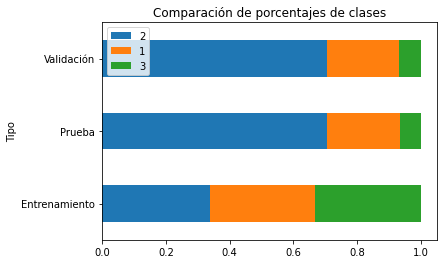

In [67]:
df_clases.plot( 
    x = 'Tipo', 
    kind = 'barh', 
    stacked = True, 
    title = 'Comparación de porcentajes de clases', 
    mark_right = True) 

## Calculo de índice